# Cross Validation Methods

Model validation allows you to predict how your model will perform on datasets not used in the training. Model validation is important because we don’t actually care how well the model predicts data we trained it on. We already know the target values for the data we used to train a model, and as such it is much more important to consider how robust and capable a model is when tasked to model new datasets of the same distribution and characteristics, but with different individual values from our training set.

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

calihouses = datasets.fetch_california_housing()
calidata = calihouses.data

In [2]:
# define the columns names of the data then convert to dataframe
headers = calihouses.feature_names
df = pd.DataFrame(calidata, columns=headers)
# print the df and shape to get a better understanding of the data
print(df.shape)
print(df)

(20640, 8)
       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
5      4.0368      52.0  4.761658   1.103627       413.0  2.139896     37.85   
6      3.6591      52.0  4.931907   0.951362      1094.0  2.128405     37.84   
7      3.1200      52.0  4.797527   1.061824      1157.0  1.788253     37.84   
8      2.0804      42.0  4.294118   1.117647      1206.0  2.026891     37.84   
9      3.6912      52.0  4.970588   0.990196      1551.0  2.172269     37.84   
10     3.2031      52.0  5.477612   1.079602       910.0  2.263682     37.85   
11     3.2705      52.0  4.77

# Hold Out Validation 

The hold out method can be effective and computationally inexpensive on very large datasets, or on limited computational resources. It is also often easier to implement and understand for beginners.

In [3]:
# first store all target data to a variable
y = calihouses.target
# create testing and training sets for hold-out verification using scikit learn method
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size = 0.25)
# validate set shapes
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(15480, 8) (15480,)
(5160, 8) (5160,)


In [5]:
# time function using .time methods for later comparison
from timeit import default_timer as timer
start_ho = timer()
# fit a model using linear model method from sklearn
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(x_train, y_train)
# generate predictions
pred = lr.predict(x_test)
end_ho = timer()
# calcualte function runtime
time_ho = (end_ho - start_ho)
# show predictions
print(pred)

[1.1611732  2.86876003 2.20617664 ... 2.80989001 2.7094524  3.29211799]


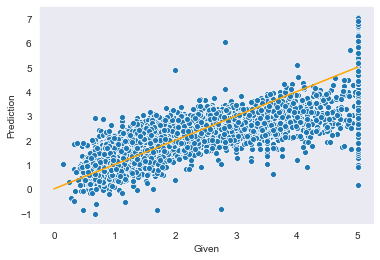

In [6]:
# import seaborn and plotly
import matplotlib.pyplot as plt
import seaborn as sns
# set viz style
sns.set_style('dark')
# plot the model
plot = sns.scatterplot(y_test, pred)
plot.set(xlabel='Given', ylabel='Prediction')
# generate and graph y = x line
x_plot = np.linspace(0,5,100)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='orange')
plt.show()

In [8]:
start_ho_score = timer()
# model score (neg_mean_squared_error)
from sklearn import metrics
ho_score = -1*metrics.mean_squared_error(y_test, pred)
print(ho_score)
end_ho_score = timer()
ho_score_time = (end_ho_score - start_ho_score)

-0.5145921323935343


# K-Fold Cross Validation

K-fold validation is a popular method of cross validation which shuffles the data and splits it into k number of folds (groups)


K-Fold can be very effective on medium sized datasets, though by adjusting the K value can significantly alter the results of the validation. Let’s add to our rule from earlier; as k increases, bias decreases, and variance and computational requirements increase. K-Fold cross validation is likely the most common of the three methods due to the versatility of adjusting K-values.

In [10]:
# store data as an array
x = np.array(df)
# again, timing the function for comparison
start_kfold = timer()
# use cross_val_predict to generate K-Fold predictions
from sklearn.model_selection import cross_val_predict
lr_k = LinearRegression()
k_pred = cross_val_predict(lr_k, x, y, cv=10)
print(k_pred)
end_kfold = timer()
kfold_time = (end_kfold - start_kfold)

[4.22358985 4.04800271 3.75534521 ... 0.14474758 0.29600522 0.49525933]


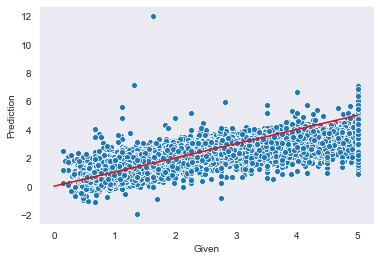

In [11]:
# plot k-fold predictions against actual
plot_k = sns.scatterplot(y, k_pred)
plot_k.set(xlabel='Given', ylabel='Prediction')
# generate and graph y = x line
x_plot = np.linspace(0,5,100)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='red')
plt.show()

Now let’s get the scores of the 10 generated models and plot them into a visualization.

-0.5509524296956657


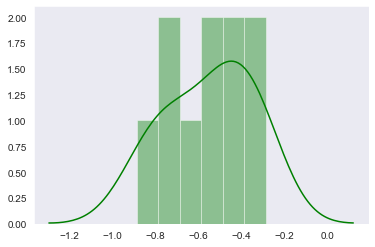

In [14]:
from sklearn.model_selection import cross_val_score
kfold_score_start = timer()
# find the mean score from the k-fold models usinf cross_val_score
kfold_scores = cross_val_score(lr_k, x, y, cv=10, scoring='neg_mean_squared_error')
print(kfold_scores.mean())
kfold_score_end = timer()
kfold_score_time = (kfold_score_end - kfold_score_start)
# plot scores
sns.distplot(kfold_scores, bins=6, color='green')

# Leave One Out Cross Validation

Leave One Out Cross Validation (LOOCV) can be considered a type of K-Fold validation where k=n given n is the number of rows in the dataset. Other than that the methods are quire similar. 


LOOCV is most useful in small datasets as it allows for the smallest amount of data to be removed from the training data in each iteration. However, in large datasets the process of generating a model for each row in the dataset can be incredibly computationally expensive and thus prohibitive for larger datasets.

In [15]:
start_LOO = timer()
# generate LOO predictions
LOO_pred = cross_val_predict(lr_k, x, y, cv=(len(x)))
end_LOO = timer()
LOO_time = (end_LOO - start_LOO)

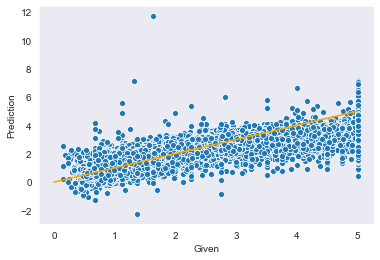

In [16]:
# plot LOO predictions against actual
plot_LOO = sns.scatterplot(y, LOO_pred)
plot_LOO.set(xlabel='Given', ylabel='Prediction')
# generate and graph y = x line
x_plot = np.linspace(0,5,100)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='orange')

In [17]:
LOO_score_start = timer()
# find the mean score from the LOO models using cross_val_score 
LOO_score = cross_val_score(lr_k, x, y, cv=(len(x)), scoring='neg_mean_squared_error').mean()
print(LOO_score)
LOO_score_end = timer()
LOO_score_time = (LOO_score_end - LOO_score_start)

-0.5282462043712455


Now lets compare the run times and scores of our three methods:

In [18]:
print("Hold out method took", time_ho, "seconds to generate a model and", ho_score_time ,"seconds to generate a MSE of", ho_score)
print("K-Fold method took", kfold_time, 'seconds to generate a model and', kfold_score_time, 'seconds to generate a MSE of', kfold_scores.mean())
print("Leave One Out Cross Validation method took", LOO_time, 'seconds to generate a model and', LOO_score_time, 'seconds to generate a MSE of', LOO_score)

Hold out method took 0.015464600000001383 seconds to generate a model and 0.0012977000000020666 seconds to generate a MSE of -0.5145921323935343
K-Fold method took 0.1959540000000004 seconds to generate a model and 0.17946270000000197 seconds to generate a MSE of -0.5509524296956657
Leave One Out Cross Validation method took 419.89637830000004 seconds to generate a model and 453.5478382 seconds to generate a MSE of -0.5282462043712455


As we noticed in the results of our comparison, we can see that the LOOCV method takes way longer to complete than our other two. This is because that method creates and evaluates a model for each row in the dataset. Even though our MSE is a little lower, this may not be worth it given the additional computational requirements. 